In [113]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from IPython.display import display

from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
# Load the data and examine it
train_df = pd.read_csv(r'C:\train.csv')
test_df = pd.read_csv(r'C:\test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


Train dataset has 1460 entries and 81 features. Test set has 1459 entries and 80 features. As expected the SalesPrice feature is missing from the test data. 
Lets look at the number of numeric and categorical features in the training data.

In [5]:
# Descriptive stats
numerical = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
numerical.remove('SalePrice')
numerical.remove('Id')
categorical = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
print(len(numerical))
print(len(categorical))

36
43


In [6]:
numerical_test1 = [f for f in test_df.columns if test_df.dtypes[f] != 'object']
numerical_test1.remove('Id')
categorical_test1 = [f for f in test_df.columns if test_df.dtypes[f] == 'object']
print(len(numerical_test1))
print(len(categorical_test1))

36
43


There are 36 numerical features and 43 categorical features in the training data set.

In [7]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [8]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
# examine the general stats of all the numeric variables using the describe function
display(train_df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Exploratory Data analysis

In [ ]:
# To begin lets look at the distribution of the SalesPrice variable
sns.distplot(train_df['SalePrice'], kde = True)

In [11]:
# Distribution of the SalePrice variable has a longer tail on the right. Check for skewness and Kurtosis
print ('Skew:', train_df['SalePrice'].skew())
print('Kurtosis:', train_df['SalePrice'].kurtosis())

Skew: 1.8828757597682129
Kurtosis: 6.536281860064529


SalesPrice is heavily skewed and heavily tailed. Let's look at the distributions of all other numeric variables in the dataframe.

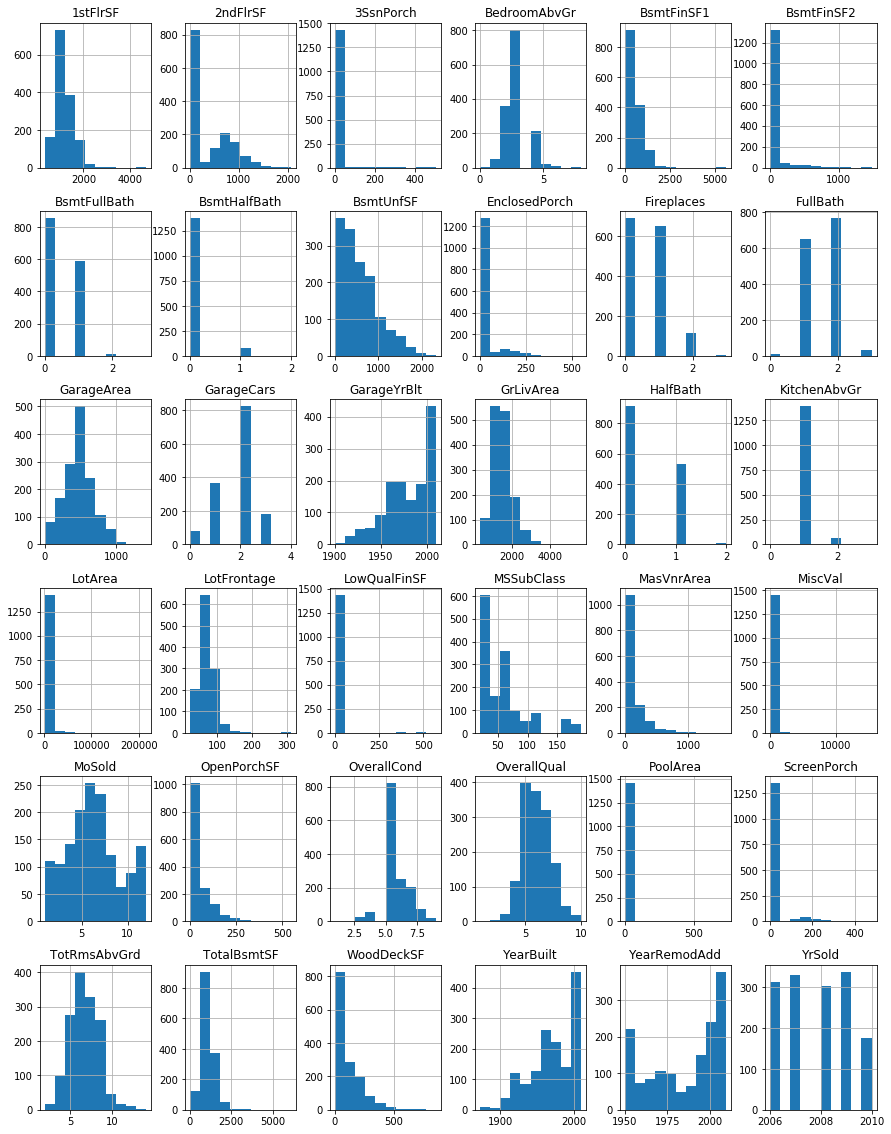

In [12]:
hist_num = train_df[numerical].hist(figsize = (15,20))

None of the features look normally distributed. Lets calculate their skewness and kurtosis and also their correlation with the SalesPrice. Correlation will tell us which features are improtant for our model.

In [13]:
skewness = train_df.skew()
kurtosis = train_df.kurt() 
corr = train_df.corr()['SalePrice']
# construct a data frame for easier display 
cols = ['skewness', 'kurtosis', 'corr_saleprice']
df_stat = pd.concat([skewness, kurtosis, corr], axis=1)
df_stat.columns = cols
df_stat.sort_values(by='corr_saleprice', ascending=False)


,skewness,kurtosis,corr_saleprice
SalePrice,1.882876,6.536282,1.000000
OverallQual,0.216944,0.096293,0.790982
GrLivArea,1.366560,4.895121,0.708624
GarageCars,-0.342549,0.220998,0.640409
GarageArea,0.179981,0.917067,0.623431
TotalBsmtSF,1.524255,13.250483,0.613581
1stFlrSF,1.376757,5.745841,0.605852
FullBath,0.036562,-0.857043,0.560664
TotRmsAbvGrd,0.676341,0.880762,0.533723
YearBuilt,-0.613461,-0.439552,0.522897


Features that are highly skewed, heavily tailed distributions and strong correlation to the salesprice are:
1. GrLivArea: ground and living area 
2. TotalBsmtSF: total basement area
3. 1stFlrSF: first floor area
 
Features that are skewed, heavy-tailed distribution, and with good correlation to Sales Price are: 
1. LotArea
2. KitchenAbvGr
3. ScreenPorch
4. EnclosedPorch
5. MasVnrArea
6. OpenPorchSF
7. LotFrontage
8. BsmtFinSF1
9. WoodDeckSF
10. MSSubClass

Features that are highly skewed, heavy-tailed distribution, and with low correlation to Sales Price are:
1. MiscVal
2. TSsnPorch
3. LowQualFinSF
4. BsmtFinSF2
5. BsmtHalfBa

Features that are low skewed, and with good to low correlation to Sales Price are:
1. BsmtUnfSF
2. 2ndFlrSF
3. TotRmsAbvGrd
4. HalfBath
5. Fireplaces
6. BsmtFullBath
7. OverallQual
8. BedroomAbvGr
9. GarageArea
10. FullBath
11. GarageCars
12. OverallCond


Lets plot scatter plots of all numeric features against SalesPrice to visulaize their dependence.

In [14]:
scatter_col = numerical.append('SalePrice')

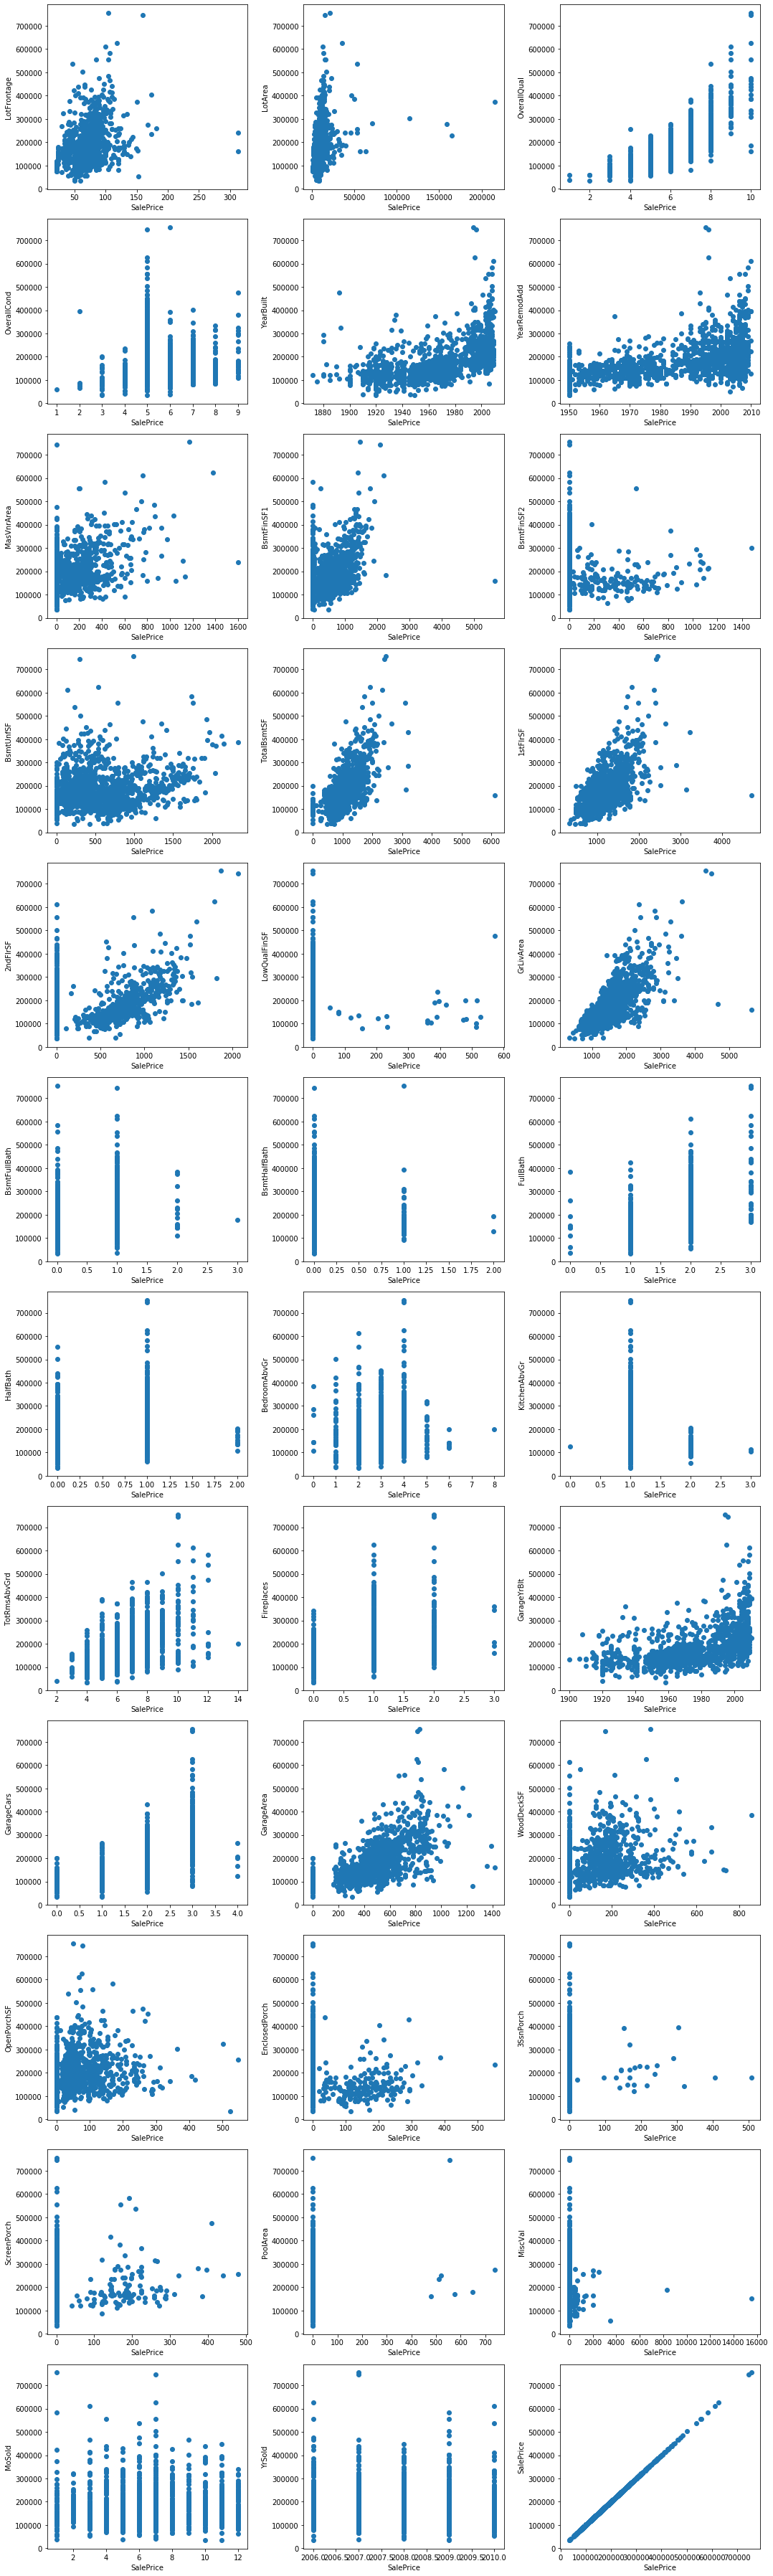

In [15]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numerical[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(train_df[col], train_df['SalePrice'])
    plt.xlabel('SalePrice')
    plt.ylabel(col)
fig.tight_layout()

fig.savefig('numeric_scatter.png')

At first glance, thhe following observations can be made:
1. Looking at the vertical scale of the features at 0 shows that are a lot of null values in the data which will have to be taken care of before applying learning models.
2. The fetures such as GrLivArea (ground and living area), TotalBsmtSF (total basement area) and 1stFlrSF (first floor area) show a strong increasing trend with the saleprice.
3. There are lot of outliers in the data. Outliers can pull the estimated regression models from the true population regression line. So, these will have to be removed before analysis.
4. Many features such as 'Year Sold', 'Month Sold', 'Pool area' etc. do not show a strong relation with the saleprice.

Lets look at some of the categorical features next. Box plots is a better way to study categorical features.

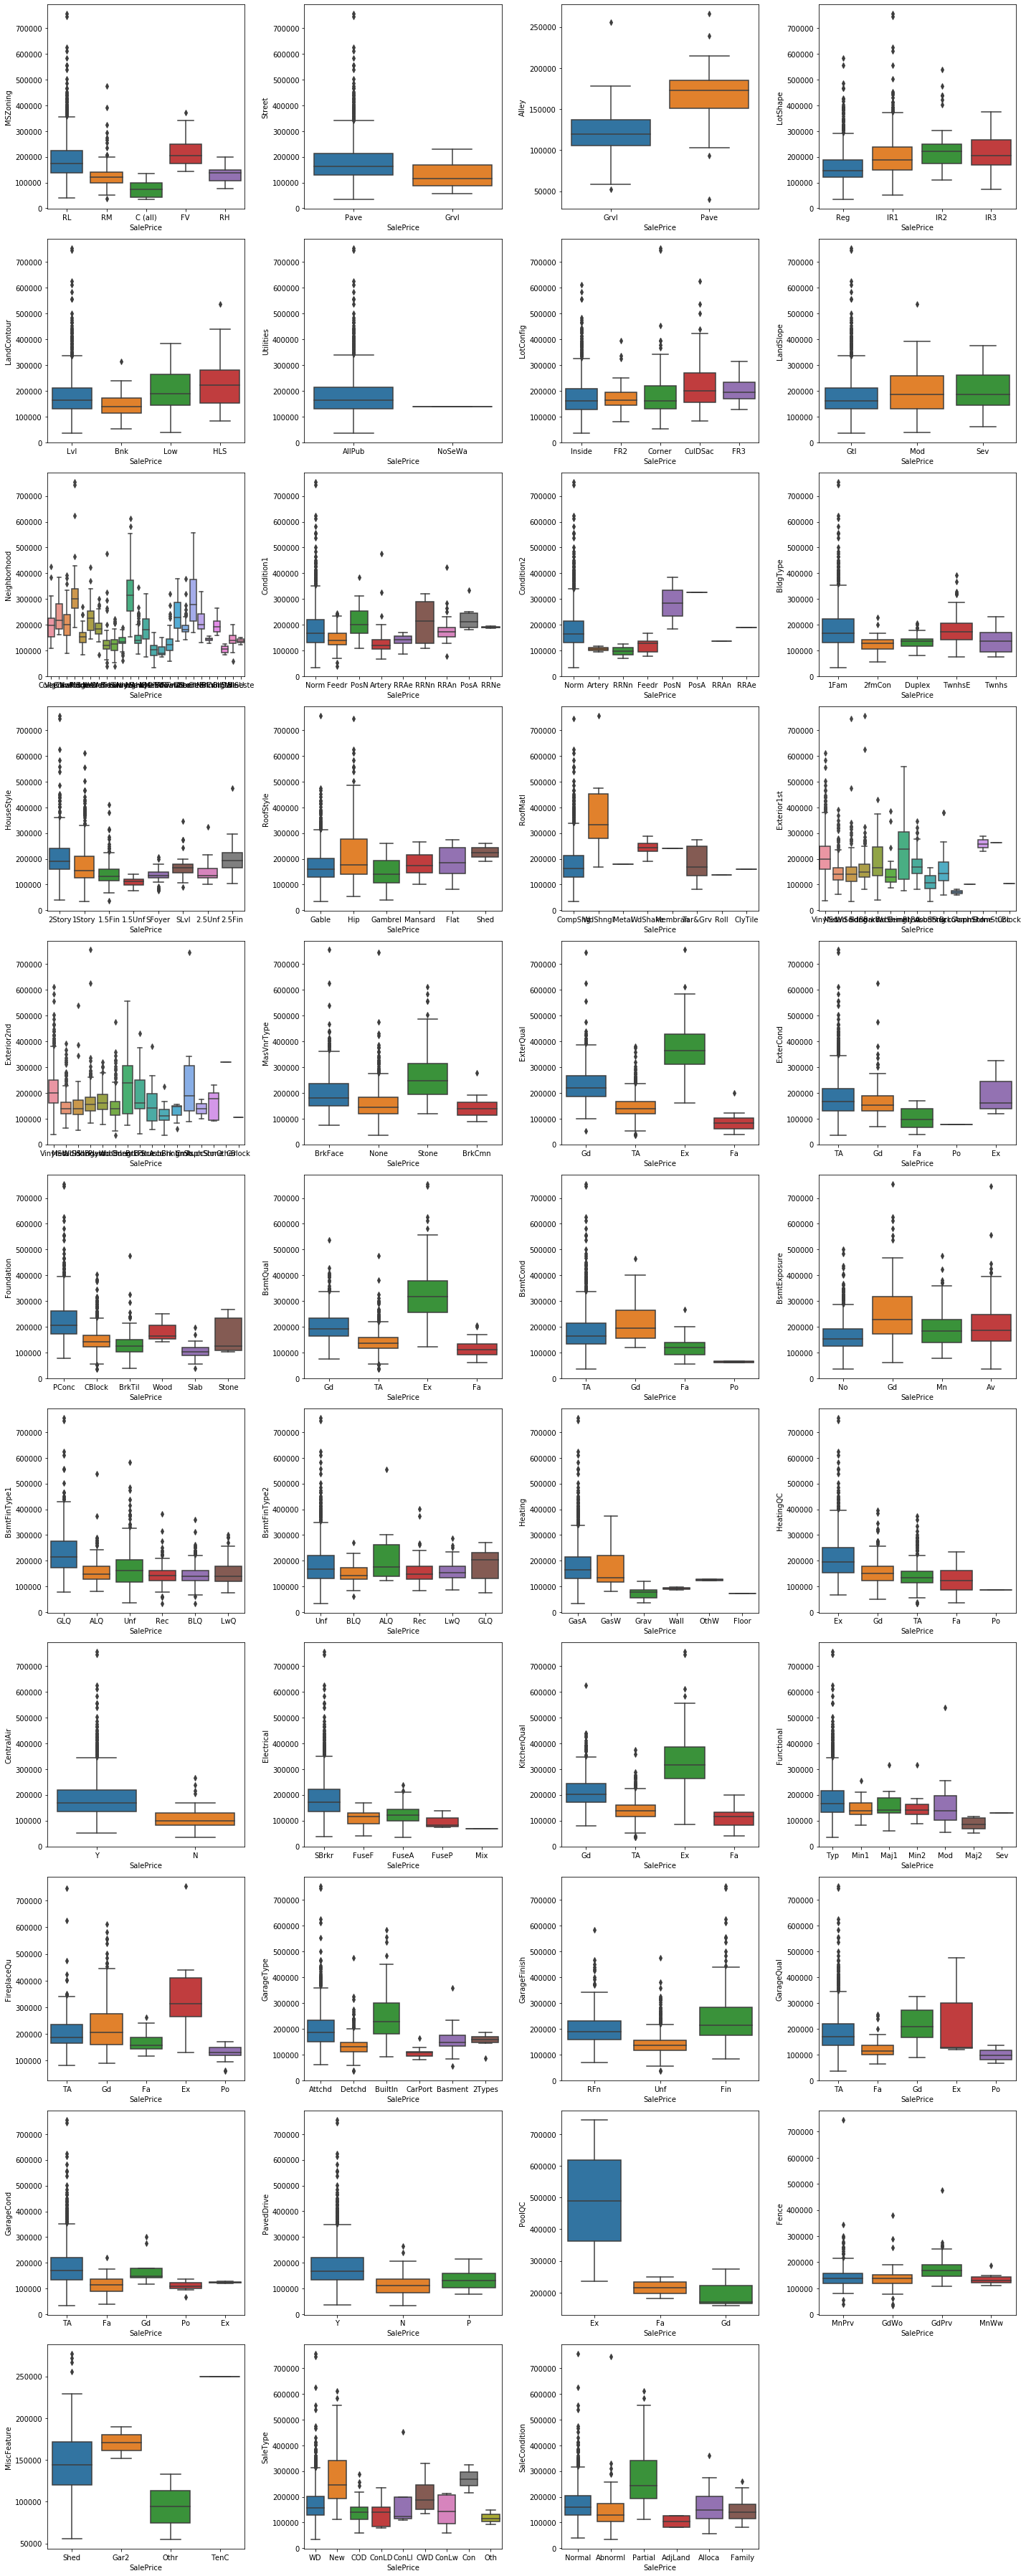

In [16]:
fig = plt.figure(figsize=(20,50))
for i, col in enumerate(categorical):
    fig.add_subplot(11,4,i+1)
    sns.boxplot(train_df[col], train_df['SalePrice'], data = train_df)
    plt.xlabel('SalePrice')
    plt.ylabel(col)
fig.tight_layout()


1. None of the categorical features seem to show a strong correlation with saleprice.
2. There are a lot of outliers in the data.

## Data preprocessing

##### 1. Fill missing values

First calculate percentage of missing data in the training and test sets and look at the unique values for each feature to get a feel for what values to impute with.

In [17]:
missing_df = pd.DataFrame(columns = ['Total_null', 'Percent_null', 'Unique_vals'])
missing_df['Total_null'] = train_df.isnull().sum().sort_values(ascending = False)
missing_df['Percent_null'] = train_df.isnull().sum().sort_values(ascending = False) / train_df.shape[0]
missing_df['Unique_vals'] = train_df.apply(lambda x: [x.unique()])

In [18]:
missing_df.head(20)

,Total_null,Percent_null,Unique_vals
PoolQC,1453,0.995205,"[[nan, Ex, Fa, Gd]]"
MiscFeature,1406,0.963014,"[[nan, Shed, Gar2, Othr, TenC]]"
Alley,1369,0.937671,"[[nan, Grvl, Pave]]"
Fence,1179,0.807534,"[[nan, MnPrv, GdWo, GdPrv, MnWw]]"
FireplaceQu,690,0.472603,"[[nan, TA, Gd, Fa, Ex, Po]]"
LotFrontage,259,0.177397,"[[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na..."
GarageCond,81,0.055479,"[[TA, Fa, nan, Gd, Po, Ex]]"
GarageType,81,0.055479,"[[Attchd, Detchd, BuiltIn, CarPort, nan, Basme..."
GarageYrBlt,81,0.055479,"[[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993..."
GarageFinish,81,0.055479,"[[RFn, Unf, Fin, nan]]"


In [19]:
missing_df_test = pd.DataFrame(columns = ['Total_null', 'Percent_null', 'Unique_vals'])
missing_df_test['Total_null'] = test_df.isnull().sum().sort_values(ascending = False)
missing_df_test['Percent_null'] = test_df.isnull().sum().sort_values(ascending = False) / test_df.shape[0]
missing_df_test['Unique_vals'] = test_df.apply(lambda x: [x.unique()])
missing_df_test.head(20)

,Total_null,Percent_null,Unique_vals
PoolQC,1456,0.997944,"[[nan, Ex, Gd]]"
MiscFeature,1408,0.965045,"[[nan, Gar2, Shed, Othr]]"
Alley,1352,0.926662,"[[nan, Pave, Grvl]]"
Fence,1169,0.801234,"[[MnPrv, nan, GdPrv, GdWo, MnWw]]"
FireplaceQu,730,0.500343,"[[nan, TA, Gd, Po, Fa, Ex]]"
LotFrontage,227,0.155586,"[[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63...."
GarageCond,78,0.053461,"[[TA, nan, Fa, Gd, Po, Ex]]"
GarageQual,78,0.053461,"[[TA, nan, Fa, Gd, Po]]"
GarageYrBlt,78,0.053461,"[[1961.0, 1958.0, 1997.0, 1998.0, 1992.0, 1993..."
GarageFinish,78,0.053461,"[[Unf, Fin, RFn, nan]]"


Features such as 'PoolQc', 'MiscFeature', 'Alley', 'Fence' and 'FireplacQu' have more than 50% null values, so its better to drop these features. Lets drop these from both test and train datasets.

In [20]:
train_df_mod1 = train_df.drop(missing_df[missing_df['Percent_null'] > 0.4].index, axis = 1)  
test_df_mod1 = test_df.drop(missing_df_test[missing_df_test['Percent_null'] > 0.4].index, axis = 1)

Lets also drop the 'Id variable from train and test data sets.

In [21]:
train_df_mod1.drop(['Id'], axis=1, inplace=True)
test_df_mod1.drop(['Id'], axis=1, inplace=True)

In [22]:
print(train_df_mod1.shape)
print(test_df_mod1.shape)

(1460, 75)
(1459, 74)


In [23]:
numerical_train1 = [f for f in train_df_mod1.columns if train_df_mod1.dtypes[f] != 'object']
numerical_train1.remove('SalePrice')
categorical_train1 = [f for f in train_df_mod1.columns if train_df_mod1.dtypes[f] == 'object']
print(len(numerical_train1))
print(len(categorical_train1))

36
38


In [24]:
numerical_test2 = [f for f in test_df_mod1.columns if test_df_mod1.dtypes[f] != 'object']
categorical_test2 = [f for f in test_df_mod1.columns if test_df_mod1.dtypes[f] == 'object']
print(len(numerical_test2))
print(len(categorical_test2))

36
38


Lets also drop the features that have -0.03 < correlation < 0.04 with the saleprice since they won't affect our prediction.

In [25]:
drop_features = corr[(corr < 0.04) & (corr > - 0.03)].index
drop_features = drop_features[drop_features != 'Id']
train_df_mod2 = train_df_mod1.drop(drop_features, axis = 1)
test_df_mod2 = test_df_mod1.drop(drop_features, axis = 1)

In [26]:
print(train_df_mod2.shape)
print(test_df_mod2.shape)

(1460, 70)
(1459, 69)


In [27]:
numerical_train2 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] != 'object']
numerical_train2.remove('SalePrice')
categorical_train2 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] == 'object']
print(len(numerical_train2))
print(len(categorical_train2))

31
38


In [28]:
numerical_test3 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] != 'object']
categorical_test3 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] == 'object']
print(len(numerical_test3))
print(len(categorical_test3))

31
38


Now lets look at features with missing values that show strong correlation with Saleprice. 
1. LotFrontage:
One possible strategy for imputation can be to look at LotArea. It should have a significant correlation with LotFrontage. Instead of a linear relationship, LotFrontage should be realted to sqrt(LotArea). lets check if this is true:

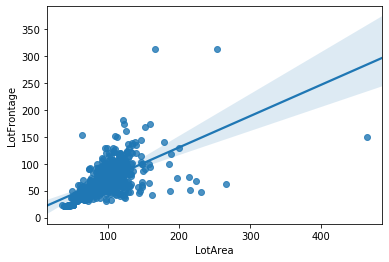

In [29]:
sns.regplot(train_df_mod2['LotArea'].apply(np.sqrt), train_df_mod2['LotFrontage'])

This clearly shows a strong linear relationship. There are a few outliers here that will be treated later. Lets impute the missing values with sqrt(LotArea) in both test and train datasets.

In [30]:
train_df_mod2.loc[train_df_mod2['LotFrontage'].isnull(), 'LotFrontage'] = np.sqrt(train_df_mod2['LotArea'])
test_df_mod2.loc[test_df_mod2['LotFrontage'].isnull(), 'LotFrontage'] = np.sqrt(test_df_mod2['LotArea'])

2. Garage features: 
This consists of GarageCond, GarageQual, GarageYrBlt, GarageFinish and GarageTyp. Out of these features, GarageYrBlt is a numerical variable and rest all are categorical. The data description file states that NaN value means that garage doesn't exist. This makes imputation easier. For GarageYrBlt, one possible solution can be to replace it with the house YearBuilt. Lets see if they show some correlation. 

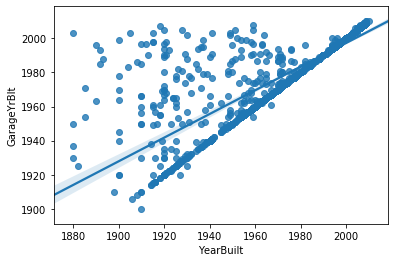

In [31]:
sns.regplot(train_df_mod2['YearBuilt'], train_df_mod2['GarageYrBlt'])

This seems to be a better choice than replcaing the missing values with 0. Lets go ahead and fix all the garage features.

In [32]:
combined = [train_df_mod2, test_df_mod2]
for dataset in combined:
    dataset['GarageType'] = dataset['GarageType'].fillna("No garage")
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna("No garage")
    dataset['GarageQual'] = dataset['GarageQual'].fillna("No garage")
    dataset['GarageCond'] = dataset['GarageCond'].fillna("No garage")
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['YearBuilt'])

In [33]:
train_df_mod2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',

In [34]:
test_df_mod2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',

In [35]:
numerical_train3 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] != 'object']
numerical_train3.remove('SalePrice')
categorical_train3 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] == 'object']
print(len(numerical_train3))
print(len(categorical_train3))

31
38


In [36]:
numerical_test4 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] != 'object']
categorical_test4 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] == 'object']
print(len(numerical_test4))
print(len(categorical_test4))

31
38


3. Basement Features: This consists of BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, BsmtHalfBath, BsmtFullBath, BsmtFinSF1, BsmtUnfSF and TotalBsmtSF. Out of these, BsmtFullBath, BsmtFinSF1, BsmtUnfSF and TotalBsmtSF are numerical and rest are categorical. Nan in Basement features means basement doesn't exist. Lets go ahead and take care of these.

In [37]:
for dataset in combined:
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna("No basement")
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna("No basement")
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna("No basement")
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna("No basement")
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna("No basement")
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)

4. Masonry Veneer features: This consists of MasVnrType (categorical) and MasVnrArea (numerical). Lets take a look at the missing values first.

In [38]:
train_df_mod2.loc[train_df_mod2['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [39]:
test_df_mod2.loc[test_df_mod2['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


Test data contains one entry where we have MasVnrArea value but corresponding Area type is nan. For this special case, lets replace the area type with 'BrkFace' which is the most commom entry.

In [40]:
test_df_mod2.loc[1150,'MasVnrType'] = 'BrkFace'

In [41]:
test_df_mod2.loc[test_df_mod2['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


We'll replace all the other MasVnrType missing values with None and the corresponding MasVnrArea values with 0. 

In [42]:
for dataset in combined:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

Before we move further, lets check the percent missing values again.

In [43]:
missing_df1 = pd.DataFrame(columns = ['Total_null', 'Percent_null', 'Unique_vals'])
missing_df1['Total_null'] = train_df_mod2.isnull().sum().sort_values(ascending = False)
missing_df1['Percent_null'] = train_df_mod2.isnull().sum().sort_values(ascending = False) / train_df_mod2.shape[0]
missing_df1['Unique_vals'] = train_df_mod2.apply(lambda x: [x.unique()])
missing_df1.head(10)

,Total_null,Percent_null,Unique_vals
Electrical,1,0.000685,"[[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]"
SalePrice,0,0.000000,"[[208500, 181500, 223500, 140000, 250000, 1430..."
ExterQual,0,0.000000,"[[Gd, TA, Ex, Fa]]"
RoofStyle,0,0.000000,"[[Gable, Hip, Gambrel, Mansard, Flat, Shed]]"
RoofMatl,0,0.000000,"[[CompShg, WdShngl, Metal, WdShake, Membran, T..."
Exterior1st,0,0.000000,"[[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace,..."
Exterior2nd,0,0.000000,"[[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood,..."
MasVnrType,0,0.000000,"[[BrkFace, None, Stone, BrkCmn]]"
MasVnrArea,0,0.000000,"[[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286...."
ExterCond,0,0.000000,"[[TA, Gd, Fa, Po, Ex]]"


In [44]:
missing_df_test1 = pd.DataFrame(columns = ['Total_null', 'Percent_null', 'Unique_vals'])
missing_df_test1['Total_null'] = test_df_mod2.isnull().sum().sort_values(ascending = False)
missing_df_test1['Percent_null'] = test_df_mod2.isnull().sum().sort_values(ascending = False) / test_df_mod2.shape[0]
missing_df_test1['Unique_vals'] = test_df_mod2.apply(lambda x: [x.unique()])
missing_df_test1.head(10)

,Total_null,Percent_null,Unique_vals
MSZoning,4,0.002742,"[[RH, RL, RM, FV, C (all), nan]]"
Functional,2,0.001371,"[[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]"
Utilities,2,0.001371,"[[AllPub, nan]]"
Exterior1st,1,0.000685,"[[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,..."
Exterior2nd,1,0.000685,"[[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,..."
KitchenQual,1,0.000685,"[[TA, Gd, Ex, Fa, nan]]"
SaleType,1,0.000685,"[[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,..."
BsmtQual,0,0.000000,"[[TA, Gd, Ex, Fa, No basement]]"
Foundation,0,0.000000,"[[CBlock, PConc, BrkTil, Stone, Slab, Wood]]"
BsmtCond,0,0.000000,"[[TA, Po, Fa, Gd, No basement]]"


5. Rest of the features: Lets take a look at the unique values and their counts for the remaining features.

In [45]:
train_df_mod2['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [46]:
train_df_mod2['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
train_df_mod2['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [48]:
train_df_mod2['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [49]:
train_df_mod2['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [50]:
train_df_mod2['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [51]:
train_df_mod2['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [52]:
train_df_mod2['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Lets impute the most fequent value for all these features. 

In [53]:
for dataset in combined:
    dataset['Electrical'] = dataset['Electrical'].fillna('SbrKr')
    dataset['MSZoning'] = dataset['MSZoning'].fillna('RL')
    dataset['Functional'] = dataset['Functional'].fillna('Typ')
    dataset['Utilities'] = dataset['Utilities'].fillna('AllPub')
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna('VinylSd')
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna('VinylSd')
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna('TA')
    dataset['SaleType'] = dataset['SaleType'].fillna('WD')

This takes care of all the missing values. Lets confirm once again.

In [54]:
train_df_mod2.isnull().sum().max()

0

In [55]:
test_df_mod2.isnull().sum().max()

0

In [54]:
print(train_df_mod2.shape)
print(test_df_mod2.shape)

(1460, 70)
(1459, 69)


In [56]:
numerical_train4 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] != 'object']
numerical_train4.remove('SalePrice')
categorical_train4 = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] == 'object']
print(len(numerical_train4))
print(len(categorical_train4))

31
38


In [57]:
numerical_test5 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] != 'object']
categorical_test5 = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] == 'object']
print(len(numerical_test5))
print(len(categorical_test5))

31
38


##### 2. Remove outliers
Lets plot the features that have a strong correlation with saleprice to detect outliers.

In [58]:
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']

C:\Users\hkaur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


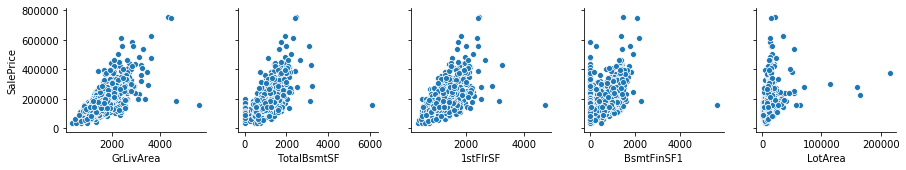

In [59]:
sns.pairplot(train_df_mod2, x_vars = col_name, y_vars = 'SalePrice', size = 2.5)

In [60]:
print(train_df_mod2.shape)

(1460, 70)


In [61]:
train_df_mod2 = train_df_mod2[train_df_mod2['GrLivArea'] < 4500]
train_df_mod2 = train_df_mod2[train_df_mod2['LotArea'] < 100000]
train_df_mod2 = train_df_mod2[train_df_mod2['TotalBsmtSF'] < 3000]
train_df_mod2 = train_df_mod2[train_df_mod2['1stFlrSF'] < 2500]
train_df_mod2 = train_df_mod2[train_df_mod2['BsmtFinSF1'] < 2000]

In [62]:
print(train_df_mod2.shape)

(1445, 70)


15 entries were removed from the train dataset.

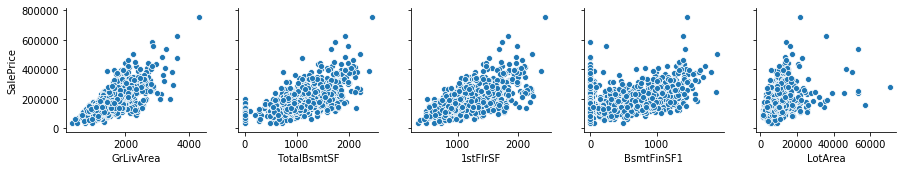

In [63]:
sns.pairplot(train_df_mod2, x_vars = col_name, y_vars = 'SalePrice', size = 2.5)

##### 3. Treating Skewness

Lets plot the distribution of saleprice once again.

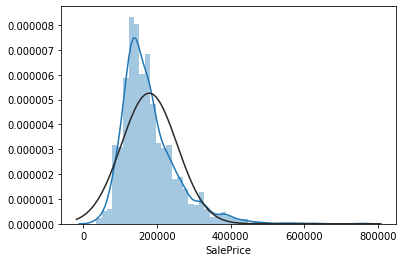

In [64]:
sns.distplot(train_df_mod2['SalePrice'], fit = norm)

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([ 34900,  35311,  37900, ..., 582933, 625000, 755000], dtype=int64)),
 (71603.08116721679, 179072.29411764708, 0.9417535088137373))

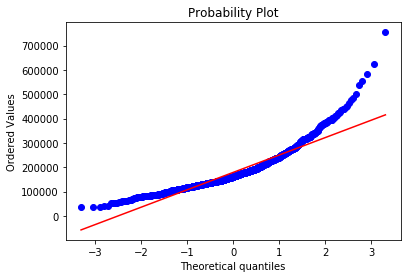

In [65]:
stats.probplot(train_df_mod2['SalePrice'], plot=plt)

Probability plot is another proof that saleprice distribution is not normally distributed. Lets look at the log of the saleprice.

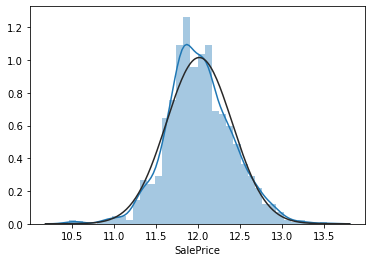

In [66]:
sns.distplot(np.log(train_df_mod2['SalePrice']), fit = norm)

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.34550693, 13.53447303])),
 (0.3921423618827373, 12.017103015616074, 0.9958940162669204))

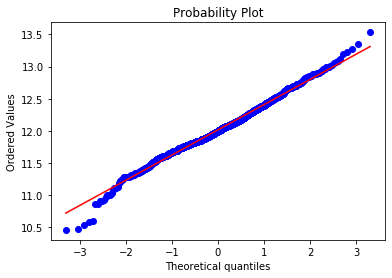

In [67]:
stats.probplot(np.log(train_df_mod2['SalePrice']), plot=plt)

This is much better. For saleprice, log transformation is sufficient is treat skewness.

In [68]:
train_df_mod2['SalePrice'] = np.log(train_df_mod2['SalePrice']) 

Lets look at the other features that show correlation with saleprice.

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([ 334,  438,  480, ..., 3608, 3627, 4316], dtype=int64)),
 (486.3883241654722, 1501.5916955017303, 0.9774718457877345))

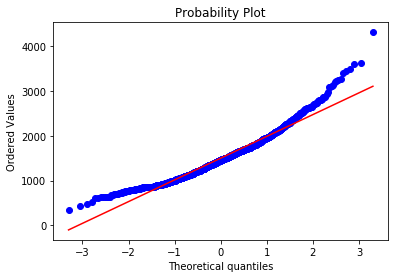

In [69]:
stats.probplot((train_df_mod2['GrLivArea']), plot = plt)

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19090888, 8.19616114,
         8.37008433])),
 (0.3271147545329047, 7.261336636616484, 0.9980425833654636))

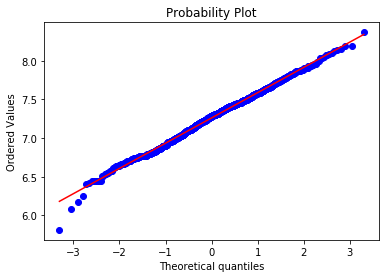

In [70]:
stats.probplot(np.log(train_df_mod2['GrLivArea']), plot=plt)

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([18.27566688, 20.92844954, 21.9089023 , ..., 60.06662967,
         60.2245797 , 65.69627082])),
 (6.2245965403719765, 38.24345188111504, 0.9943455157727445))

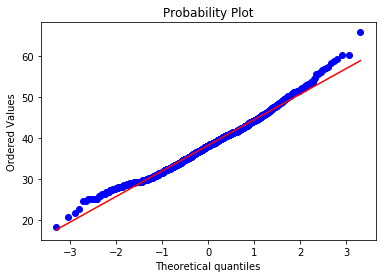

In [71]:
stats.probplot(np.sqrt(train_df_mod2['GrLivArea']), plot = plt)

((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([ 6.93823207,  7.59436332,  7.82973528, ..., 15.33753298,
         15.36440873, 16.28147745])),
 (1.230070072540271, 11.317709374985695, 0.9970756835592867))

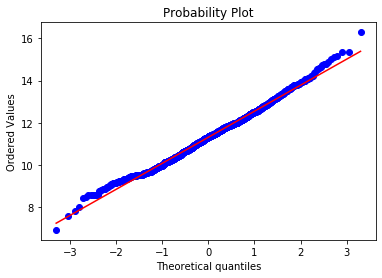

In [72]:
stats.probplot(np.power(train_df_mod2['GrLivArea'], 1.0/3), plot = plt)

Cube root transformation seems to be the best choice for this feature.

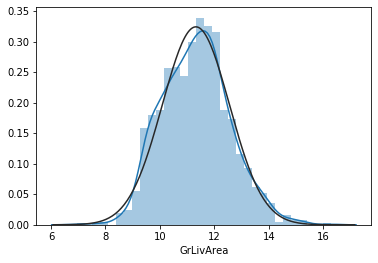

In [73]:
sns.distplot(np.power(train_df_mod2['GrLivArea'], 1./3), fit = norm)

In [74]:
train_df_mod2['GrLivArea'] = np.power(train_df_mod2['GrLivArea'], 1.0/3) 
test_df_mod2['GrLivArea'] = np.power(test_df_mod2['GrLivArea'], 1.0/3) 

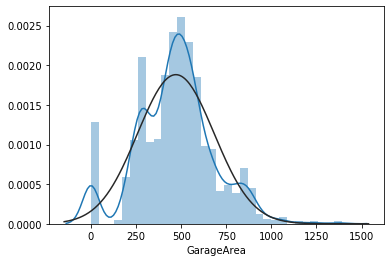

In [75]:
sns.distplot(train_df_mod2['GarageArea'], fit = norm)

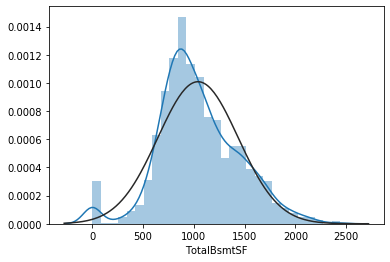

In [76]:
sns.distplot(train_df_mod2['TotalBsmtSF'], fit = norm)

To treat skewness in GarageArea and TotalBsmtSF, we need to address the problem that some houses do not have a Garage or Basement. Create new features 'HasGarage' and 'HasBsmt'

In [77]:
train_df_mod2['HasBsmt'] = 0
test_df_mod2['HasBsmt'] = 0
train_df_mod2['HasGarage'] = 0
test_df_mod2['HasGarage'] = 0

In [78]:
test_df_mod2['GarageArea'] = pd.to_numeric(test_df_mod2['GarageArea'])

In [79]:
train_df_mod2.loc[train_df_mod2['GarageArea'] > 0, ['HasGarage']] = 1
train_df_mod2.loc[train_df_mod2['TotalBsmtSF'] > 0, ['HasBsmt']] = 1
test_df_mod2.loc[test_df_mod2['GarageArea'] > 0, ['HasGarage']] = 1
test_df_mod2.loc[test_df_mod2['TotalBsmtSF'] > 0, ['HasBsmt']] = 1

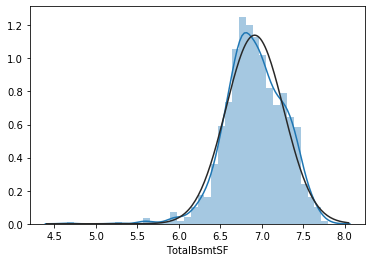

In [80]:
sns.distplot(np.log(train_df_mod2[train_df_mod2['TotalBsmtSF'] > 0]['TotalBsmtSF']), fit = norm)

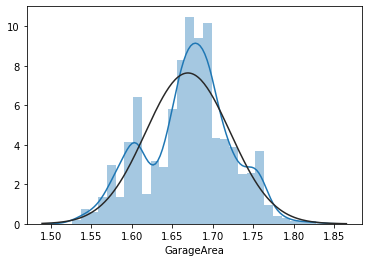

In [81]:
sns.distplot(np.power(train_df_mod2[train_df_mod2['GarageArea'] > 0]['GarageArea'] , 1./12), fit = norm)

It looks like it is difficult to get rid of skewness in GarageArea. So let's just get rid of skewness in TotalBsmtSF.

In [82]:
train_df_mod2.loc[train_df_mod2['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train_df_mod2['TotalBsmtSF']) 

C:\Users\hkaur\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
test_df_mod2.loc[test_df_mod2['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(test_df_mod2['TotalBsmtSF']) 

In [84]:
print(train_df_mod2.shape)
print(test_df_mod2.shape)

(1445, 72)
(1459, 71)


In [85]:
numerical_test = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] != 'object']
categorical_test = [f for f in test_df_mod2.columns if test_df_mod2.dtypes[f] == 'object']
print(len(numerical_test))
print(len(categorical_test))

33
38


In [86]:
numerical_train = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] != 'object']
categorical_train = [f for f in train_df_mod2.columns if train_df_mod2.dtypes[f] == 'object']
print(len(numerical_train))
print(len(categorical_train))

34
38


##### 4. Convert categorical features into dummy variables

In [96]:
train_df_mod2.select_dtypes(include = ['object']).columns.shape

(38,)

In [97]:
train_df_mod2.select_dtypes(include = ['int64']).columns.shape

(28,)

In [98]:
train_df_mod2.select_dtypes(include = ['float64']).columns.shape

(6,)

In [101]:
le = preprocessing.LabelEncoder()

In [102]:
train_df_mod2['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [103]:
le.fit(train_df_mod2['SaleType'].unique())

LabelEncoder()

In [104]:
for col in train_df_mod2.select_dtypes(include = ['object']).columns:
    le.fit(train_df_mod2[col].unique())
    train_df_mod2.loc[:, col] = le.transform(train_df_mod2[col])

In [105]:
for col in test_df_mod2.select_dtypes(include = ['object']).columns:
    le.fit(test_df_mod2[col].unique())
    test_df_mod2.loc[:, col] = le.transform(test_df_mod2[col])

In [106]:
train_df_mod2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 72 columns):
MSSubClass       1445 non-null int64
MSZoning         1445 non-null int32
LotFrontage      1445 non-null float64
LotArea          1445 non-null int64
Street           1445 non-null int32
LotShape         1445 non-null int32
LandContour      1445 non-null int32
Utilities        1445 non-null int32
LotConfig        1445 non-null int32
LandSlope        1445 non-null int32
Neighborhood     1445 non-null int32
Condition1       1445 non-null int32
Condition2       1445 non-null int32
BldgType         1445 non-null int32
HouseStyle       1445 non-null int32
OverallQual      1445 non-null int64
OverallCond      1445 non-null int64
YearBuilt        1445 non-null int64
YearRemodAdd     1445 non-null int64
RoofStyle        1445 non-null int32
RoofMatl         1445 non-null int32
Exterior1st      1445 non-null int32
Exterior2nd      1445 non-null int32
MasVnrType       1445 non-null int32
Mas

In [107]:
test_df_mod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int32
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int32
LotShape         1459 non-null int32
LandContour      1459 non-null int32
Utilities        1459 non-null int32
LotConfig        1459 non-null int32
LandSlope        1459 non-null int32
Neighborhood     1459 non-null int32
Condition1       1459 non-null int32
Condition2       1459 non-null int32
BldgType         1459 non-null int32
HouseStyle       1459 non-null int32
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int32
RoofMatl         1459 non-null int32
Exterior1st      1459 non-null int32
Exterior2nd      1459 non-null int32
MasVnrType       1459 non-null int32
Mas

## Modelling

##### 1. Random Forest Model

In [108]:
X_train = train_df_mod2.drop('SalePrice', axis = 1)
Y_train = train_df_mod2['SalePrice']

In [109]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
accRFC = round(RFR.score(X_train, Y_train), 4)
accRFC

C:\Users\hkaur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9743

In [110]:
RFR_predict_simple = RFR.predict(test_df_mod2)

In [111]:
RFR_predict_simple

array([11.70657874, 11.89582522, 12.09536008, ..., 11.90134947,
       11.67846383, 12.28246382])

Including Cross validation. The number of estimators is chosen through trial such that the cross validation scores plateaus.

In [114]:
RFR = RandomForestRegressor(n_estimators=200, n_jobs = -1)
RFR.fit(X_train, Y_train)
cross_val_score(RFR, X_train, Y_train)

C:\Users\hkaur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87720518, 0.86663375, 0.87498181])

In [116]:
RFR_predict_CV = RFR.predict(test_df_mod2)

In [117]:
RFR_actual_price_CV = np.exp(RFR_predict_CV)

In [118]:
RFR_actual_price_CV

array([123982.31834858, 152427.03239322, 174492.25766249, ...,
       149931.70038705, 112103.32888473, 229231.97323112])

Let's look at the importance of various features

In [119]:
coefRFR = pd.Series(RFR.feature_importances_, index = X_train.columns).sort_values()

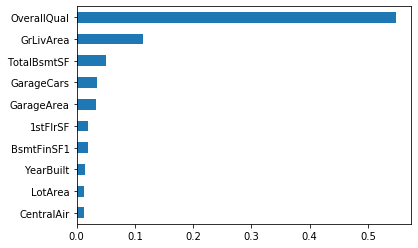

In [120]:
coefRFR.tail(10).plot(kind = 'barh')

We see that the important features we find here overlap with the important features we guessed from the correlation matrix

##### 2. Gradient Boosting 

In [121]:
GB100 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, subsample= 0.8)
GB100.fit(X_train, Y_train)
cross_val_score(GB100, X_train, Y_train)

C:\Users\hkaur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.91311215, 0.88653939, 0.89138636])

In [122]:
GB3000 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = 5)
GB3000.fit(X_train, Y_train)
cross_val_score(GB3000, X_train, Y_train)

C:\Users\hkaur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.91982558, 0.88843578, 0.91052221])

In [123]:
coef3000 = pd.Series(GB3000.feature_importances_, index = X_train.columns).sort_values(ascending = False)

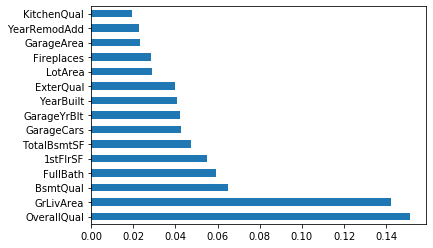

In [124]:
coef3000.head(15).plot(kind = 'barh')

In [125]:
coef100 = pd.Series(GB100.feature_importances_, index = X_train.columns).sort_values(ascending = False)

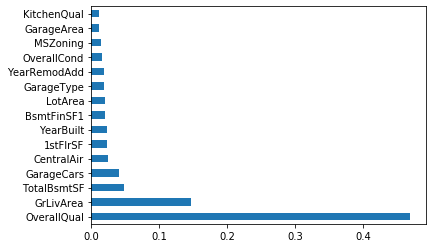

In [127]:
coef100.head(15).plot(kind = 'barh')

Feature importance depends on the method used and the details of the methods.

In [128]:
GB_predict_CV = GB3000.predict(test_df_mod2)

In [129]:
GB_predict_CV

array([11.69083583, 11.9893617 , 12.14859255, ..., 11.90342367,
       11.64795799, 12.25766299])

In [130]:
GB_actual_price_CV = np.exp(GB_predict_CV)

In [131]:
GB_actual_price_CV

array([119471.822994  , 161032.53425756, 188828.13688167, ...,
       147771.68094307, 114457.40141638, 210588.86272152])

In [136]:
RFRpred = RFR.predict(X_train)
GBpred3000 = GB3000.predict(X_train)
GBpred100 = GB100.predict(X_train)

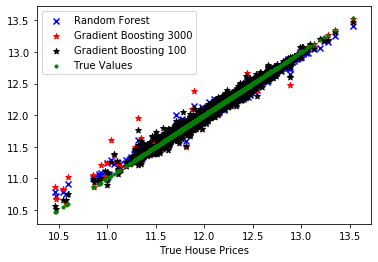

In [138]:
plt.scatter(Y_train, RFRpred, c='blue', marker='x');
plt.scatter(Y_train, GBpred3000, c='red', marker='*');
plt.scatter(Y_train, GBpred100, c='black', marker='*');
plt.scatter(Y_train, Y_train, c='green', marker='.');
plt.xlabel('True House Prices');
plt.legend(('Random Forest', 'Gradient Boosting 3000', 'Gradient Boosting 100', 'True Values'));

From the predictions on the training data, the following can be concluded:

1. Both random forest and gradient boosting models do poorly in the low SalePrice region. 

2. Increasing the numbers of the estimators in the gradient boosting models decreases the error on the bulk of the data. However, there are points where 3000 estimators does poorly than 1000 estimators.